In [1]:
import superfv.initial_conditions as ic
from superfv.euler_solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
solver = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    ic_passives={
        "passive_square": lambda x, y, z: np.where(np.abs(x - 0.5) < 0.25, 1, -1)
    },
    bcx="free",
    nx=64,
    p=3,
    MOOD=True,
    NAD=1e-5,
)
solver.run(0.245)

100%|██████████| 0.245/0.245 [00:00]               


Text(0, 0.5, 'passive_square')

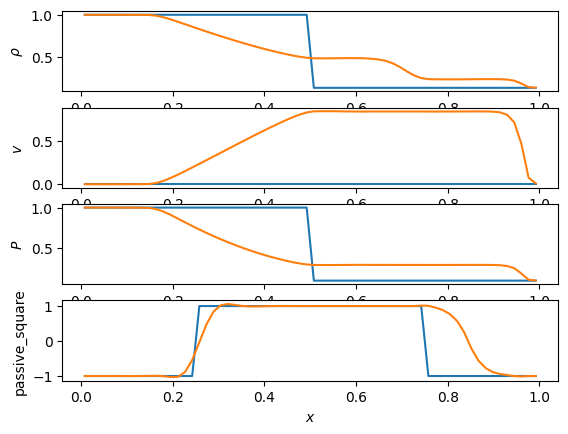

In [3]:
fig, axs = plt.subplots(4, 1)
solver.plot_1d_slice(axs[0], variable="rho", array="w", x=None, t=0)
solver.plot_1d_slice(axs[0], variable="rho", array="w", x=None, t=0.245)
axs[0].set_ylabel(r"$\rho$")
solver.plot_1d_slice(axs[1], variable="vx", array="w", x=None, t=0)
solver.plot_1d_slice(axs[1], variable="vx", array="w", x=None, t=0.245)
axs[1].set_ylabel(r"$v$")
solver.plot_1d_slice(axs[2], variable="P", array="w", x=None, t=0)
solver.plot_1d_slice(axs[2], variable="P", array="w", x=None, t=0.245)
axs[2].set_ylabel(r"$P$")
solver.plot_1d_slice(axs[3], variable="passive_square", array="w", x=None, t=0)
solver.plot_1d_slice(axs[3], variable="passive_square", array="w", x=None, t=0.245)
axs[3].set_ylabel("passive_square")

Text(0, 0.5, 'E')

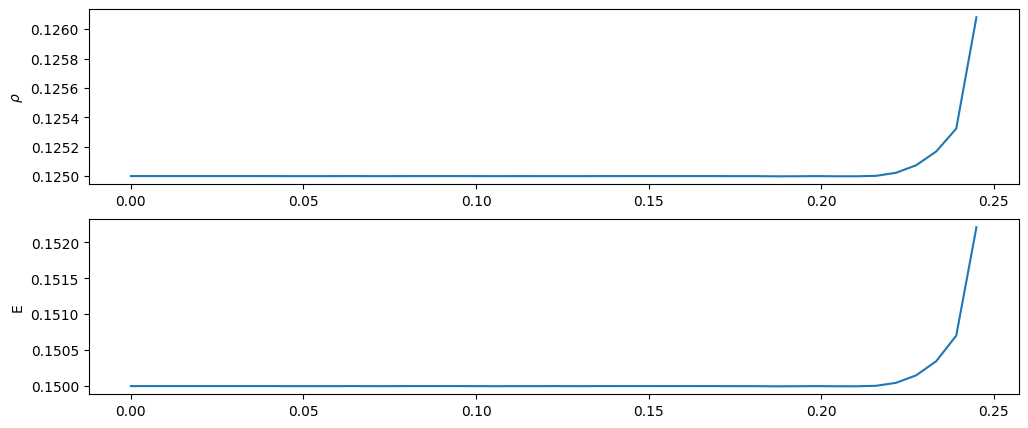

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(12, 5))

t = solver.minisnapshots["t"]

axs[0].plot(t, solver.minisnapshots["min_rho"], label=r"$\rho_{\max}$")
axs[0].set_ylabel(r"$\rho$")
axs[1].plot(t, solver.minisnapshots["min_E"], label=r"$\rho_{\max}$")
axs[1].set_ylabel(r"E")